In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd

In [4]:
file1 = 'audios/brother_asked.wav'
file2 = 'audios/one_dance.mp4'

In [7]:
audio1, sr = librosa.load(file1)
audio2, _ = librosa.load(file2)

/opt/anaconda3/envs/CV/lib/python3.6/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


In [26]:
#audio feature extraction.


class audio_data_analysis:
    
    def __init__(self, signal, frame_size):
        self.signal = signal
        self.frame_size = frame_size
        
    
    def amplitude_envelope(self):  #max value of the amplitude in the frame
        amplitude_envelops = []
        #calculating amplitude envelope for each frame
        for i in range(0, len(self.signal), self.frame_size):
            current_fame_amplitude_envelope = np.max(self.signal[i : i+self.frame_size])
            amplitude_envelops.append(current_fame_amplitude_envelope)
        return np.array(amplitude_envelops)
    

    def plot_spectrogram(self, sr, HOP_SIZE, y_axis='log'):
        S_audio1 = librosa.stft(self.signal, n_fft=self.frame_size, hop_length=HOP_SIZE)
        Y_audio1 = np.abs(S_audio1)**2
        y_log_scale = librosa.power_to_db(Y_audio1)
        plt.figure(figsize=(10, 5))
        librosa.display.specshow(y_log_scale, sr=sr, x_axis='time', y_axis=y_axis)
        plt.colorbar(format='%+2.f')
        
        
        
        
    def rms_plots(self, HOP_SIZE):
        rms_audio = librosa.feature.rms(y = self.signal, frame_length=self.frame_size, hop_length=HOP_SIZE)[0]
        frames = range(len(rms_audio))
        t1 = librosa.frames_to_time(frames, hop_length = HOP_SIZE)

        plt.figure(figsize=(15, 10))
        plt.subplot(3,1,1)
        librosa.display.waveshow(audio1, alpha=0.5)   #displaying the original audio
        plt.plot(t1,rms_audio, 'r')                   #plotting the rms energy amplitudes
        plt.title('audio1')
        plt.ylim((-1,1))
        
        
    def mel_spectrogram(self, HOP_SIZE):
        mel_spectrogram = librosa.feature.melspectrogram(y=self.signal, n_fft=self.frame_size, hop_length=HOP_SIZE, n_mels=10)
        log_mel = librosa.power_to_db(mel_spectrogram)
        plt.figure(figsize=(10,5))
        librosa.display.specshow(log_mel, x_axis='time', y_axis='mel', sr=sr)
        plt.colorbar(format="%+2.f")

In [27]:
data = audio_data_analysis(audio1, 1024)
data.amplitude_envelope() #max values in each frame

array([0.00940406, 0.05561103, 0.07174352, 0.17073308, 0.18397588,
       0.14792037, 0.10206446, 0.17126307, 0.19806601, 0.19231907,
       0.09543289, 0.02235213, 0.06192788, 0.1468162 , 0.09016616,
       0.20204489, 0.14576143, 0.15481281, 0.04942152, 0.1696171 ,
       0.09661619, 0.04329303, 0.02717058, 0.18804044, 0.17334758,
       0.06458578, 0.07978992, 0.021175  , 0.216938  , 0.2191052 ,
       0.13180517, 0.13284434, 0.15779269, 0.01214928, 0.00852545,
       0.01116649, 0.00918639, 0.02201375, 0.2006736 , 0.17718655,
       0.02779771, 0.12880474, 0.24651726, 0.18938819, 0.15360132,
       0.04768123, 0.06994766, 0.11355797, 0.19924799, 0.12665515,
       0.21360408, 0.13819636, 0.08022878, 0.07380478, 0.11996971,
       0.1088574 , 0.01662505, 0.00971596, 0.00265039], dtype=float32)

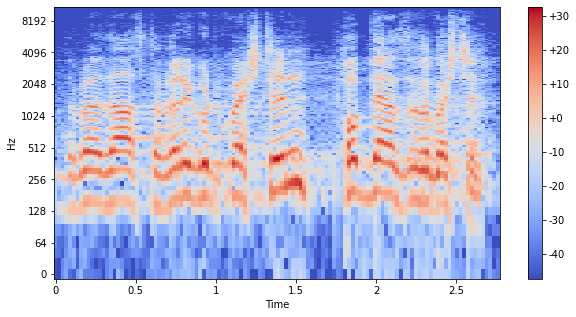

In [28]:
data.plot_spectrogram(sr, 500, 'log')

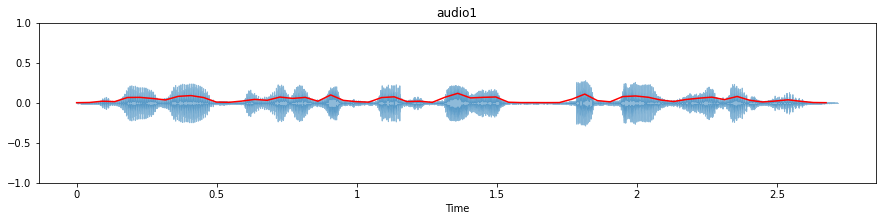

In [29]:
data.rms_plots(1000)

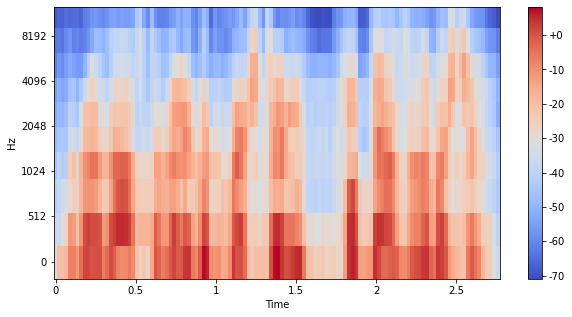

In [30]:
data.mel_spectrogram(500)  #the most important feature for audio data analysis